In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Creating initial machine learning model as baseline
# Importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


In [2]:
# Create a path reference to the file 
heart_path_replaced = Path("resources/heart_replaced_values.csv")



# Read CSV into DataFrame
df_replaced = pd.read_csv(heart_path_replaced, delimiter=",")

In [3]:
# Split our preprocessed data into our features and target arrays
y = df_replaced['HeartDisease']
X = df_replaced.drop(columns='HeartDisease')

In [4]:
# Convert categorical data to numeric with `pd.get_dummies`
X= pd.get_dummies(X)
# Drop the non-beneficial ID columns, 'HeartDisease'.

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [5]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [6]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
X_train.shape

(734, 20)

In [8]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1
########look at this further######

nn_model_4 = tf.keras.models.Sequential()

# First hidden layer
nn_model_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_4.summary()

C:\Users\Jack Runge\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
nn_model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Train the model
model = nn_model_4.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7642 - loss: 0.6616
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7858 - loss: 0.6463 
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8323 - loss: 0.6284 
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.6118 
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8447 - loss: 0.5976
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.5802 
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.5697 
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8712 - loss: 0.5407
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8629 - loss: 0.5360
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8683 - loss: 0.5178
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8625 - loss: 0.5068
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 28ms/step - accuracy: 0.8696 - loss: 0.4032
Loss: 0.40316805243492126, Accuracy: 0.8695651888847351


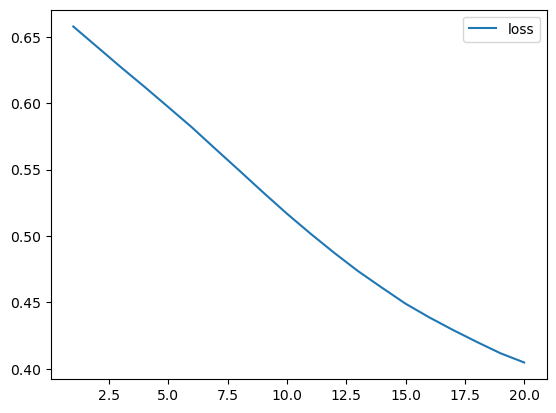

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

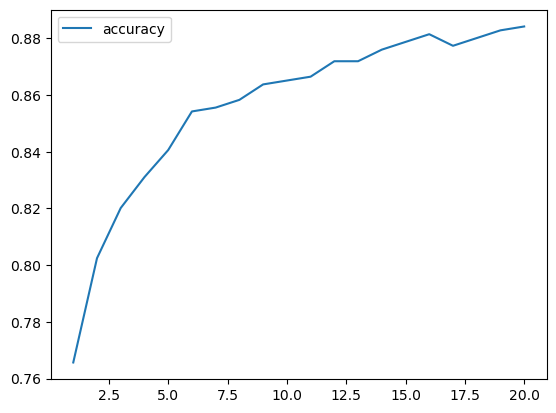

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [14]:
y_test

619    0
205    0
615    1
224    0
378    1
      ..
507    0
548    1
846    1
190    0
685    1
Name: HeartDisease, Length: 184, dtype: int64

In [15]:
y_test.shape

(184,)

In [18]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = nn_model_4.predict(X_test_scaled, verbose = 0)
predictions = predictions.ravel()

In [19]:
# Define the array and the threshold
threshold = .7

# Transform numbers to 1 or 0 based on the threshold
transformed_predictions = [1 if x > threshold else 0 for x in predictions]

print(transformed_predictions)

[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]


In [21]:
print(classification_report(y_test, transformed_predictions,
                            target_names= ["yes", "no"]))

              precision    recall  f1-score   support

         yes       0.86      0.87      0.86        82
          no       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

